<a href="https://colab.research.google.com/github/rubozero/mcd-2023-programming/blob/proyecto/marginalizacion_mex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice de marginalización de México

El Consejo Nacional de Población (CONAPO) del gobierno mexicano, realiza cada 5 años un análisis sobre un estudio multidimensional de la pobreza y establece un índice de marginación.

Para este ejercicio se utiliza la Base de datos por entidad federativa 2020

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Se carga la **Base de datos por entidad federativa 2020** seleccionando la pestaña de **IME_2020** y se utiliza como índice la columna de clave de entedidad **(CVE_ENT)**, que es la primer columna.

In [25]:
ime_url = 'http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls'
data_frame = pd.read_excel(ime_url, sheet_name=None)

df_ime = data_frame.get('IME_2020')
df_ime = df_ime.set_index(df_ime.columns[0])
df_ime.head(5)

,NOM_ENT,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
CVE_ENT,,,,,,,,,,,,,,
1,Aguascalientes,1425607,2.111950,23.578264,0.348996,0.231956,0.552683,0.774681,13.132191,21.273184,58.504352,22.205721,Muy bajo,0.816929
2,Baja California,3769020,1.829067,24.681648,0.199850,0.584066,2.099587,1.914523,14.589573,8.455248,73.550861,21.380297,Bajo,0.786563
3,Baja California Sur,798447,2.336256,23.982080,0.419939,0.961081,5.393310,5.059094,18.600851,10.279956,45.486978,21.473388,Bajo,0.789987
4,Campeche,928363,5.863136,29.781429,2.517115,1.045232,3.975752,2.687087,29.973820,29.923855,70.006264,17.805051,Alto,0.655032
5,Coahuila de Zaragoza,3146771,1.672380,21.493970,0.298874,0.169822,0.940492,0.747650,13.475173,10.039625,60.030637,22.545684,Muy bajo,0.829436


Se utiliza la pestaña 'Diccionario' del DataFrame para tener una variable diccionario con las claves y sus nombres, que se utilizan en las columnas de la pestaña IME_2020.
<br/>
Se crea un nuevo DataFrame con los nombres de las columnas obtenidos de Diccionario.

In [73]:
# Procesar la pestaña Diccionario
df_dict = data_frame.get('Diccionario').iloc[2:]
dict_col_names = {}

for index, row in df_dict.iterrows():
    key = row.iloc[0]
    value = row.iloc[1]
    dict_col_names[key] = value

df_ime_nombres = df_ime.rename(columns=dict_col_names)

Se muestra diferente información relacionada al Data Frame

In [125]:
print("Información del DataFrame IME_2020\n")

cantidad_variables = len(df_ime_nombres.columns)
print("Número de variables: {}".format(cantidad_variables))

valores_perdidos = df_ime_nombres.columns[df_ime_nombres.isnull().any()].tolist()
print("Valores perdidos: {}".format(valores_perdidos if len(valores_perdidos) > 0 else 0))

variables_numericas = df_ime.select_dtypes(include=['int', 'float']).columns.tolist()
print("Variables cuantitativas (Código): {}".format(variables_numericas if len(variables_numericas) > 0 else 0))

variables_numericas = df_ime_nombres.select_dtypes(include=['int', 'float']).columns.tolist()
print("Variables cuantitativas (Nombre): {}".format(variables_numericas if len(variables_numericas) > 0 else 0))

variables_cualitativas = df_ime_nombres.select_dtypes(include=['object']).columns.tolist()
print("Variables cualitativas (Código): {}".format(variables_cualitativas if len(variables_cualitativas) > 0 else 0))

variables_cualitativas = df_ime.select_dtypes(include=['object']).columns.tolist()
print("Variables cualitativas (Nombre): {}".format(variables_cualitativas if len(variables_cualitativas) > 0 else 0))

Información del DataFrame IME_2020

Número de variables: 14
Valores perdidos: 0
Variables cuantitativas (Código): ['POB_TOT', 'ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM', 'IM_2020', 'IMN_2020']
Variables cuantitativas (Nombre): ['Población total', 'Porcentaje de población analfabeta de 15 años o más', 'Porcentaje de población de 15 años o más sin educación básica', 'Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado', 'Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica', 'Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada', 'Porcentaje de ocupantes en viviendas particulares habitadas con piso de tierra', 'Porcentaje de viviendas particulares con hacinamiento', 'Porcentaje de población que vive en localidades menores a 5 000 habitantes', 'Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos', 'Índice de marginación, 2020', 'Índice de marginac

Se define una función para graficar (gráfica de barras) la columna solicitad por estado

In [145]:
def dibujar_barras_por_estado(col_name):
  '''
  Genera una gráfica de barras con las entidades en el eje X y el nombre la columna recibida en el eje de las Y.
  Se utiliza la librería de matplotlib para generar la gráfica de barras con plt.bar.
  En la gráfica se dibuja una línea media para indicar la media de los valores

  Parámetro: String (col_name): Nombre de la columna del DataFrame
  
  Ejemplo de uso: dibujar_barras_por_estado('ANALF')
  Genera la gráfica de barras con el Porcentaje de población analfabeta de 15 años o más
  '''
  columna = df_ime[col_name]
  barras = plt.bar(df_ime['NOM_ENT'], columna, color=['r' if d > columna.mean() else 'b' for d in columna])
  plt.xticks(rotation = 90)
  plt.title(dict_col_names[col_name] + " por entidad")
  plt.axhline(y=np.nanmean(columna), color='red', linestyle='--', linewidth=1, label='Avg')
  plt.show()




Solicitud de gráficas para cada columna con valores cuantitativos

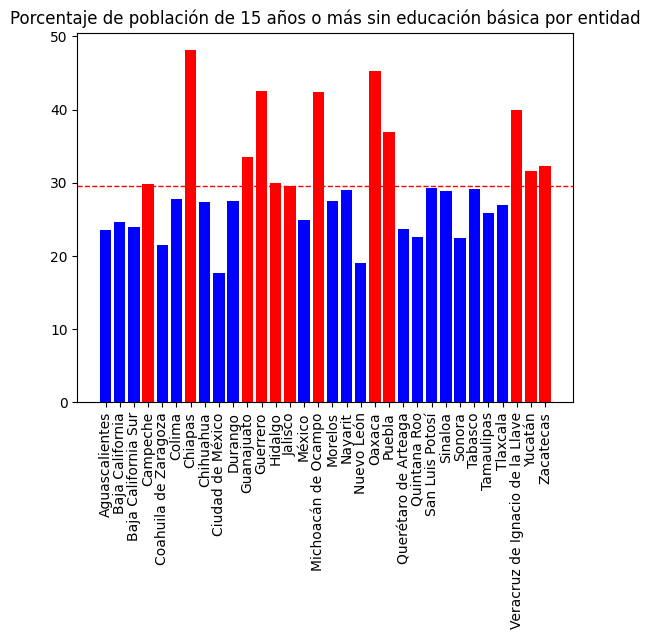

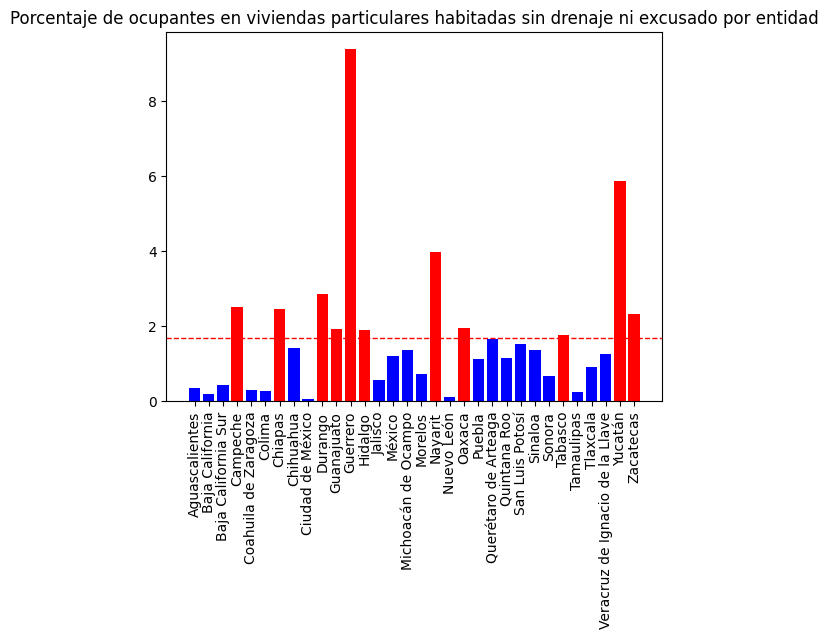

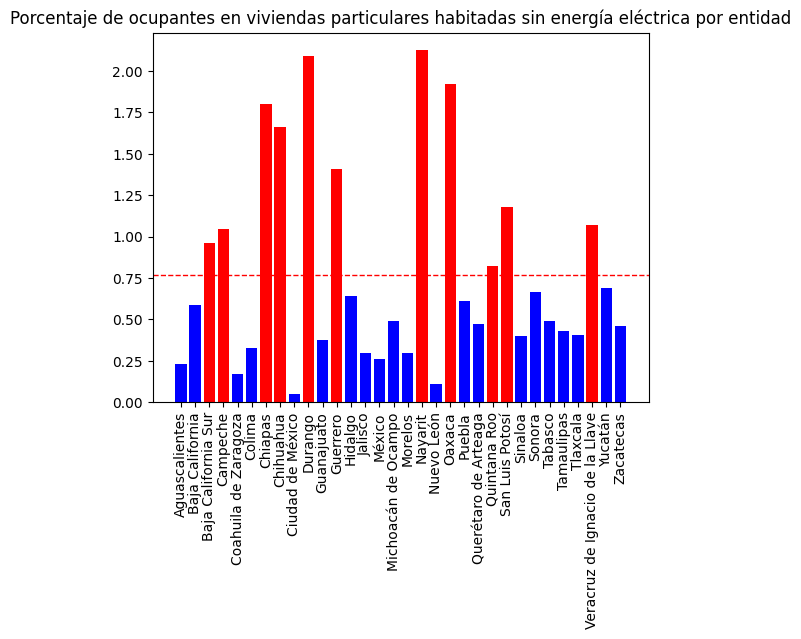

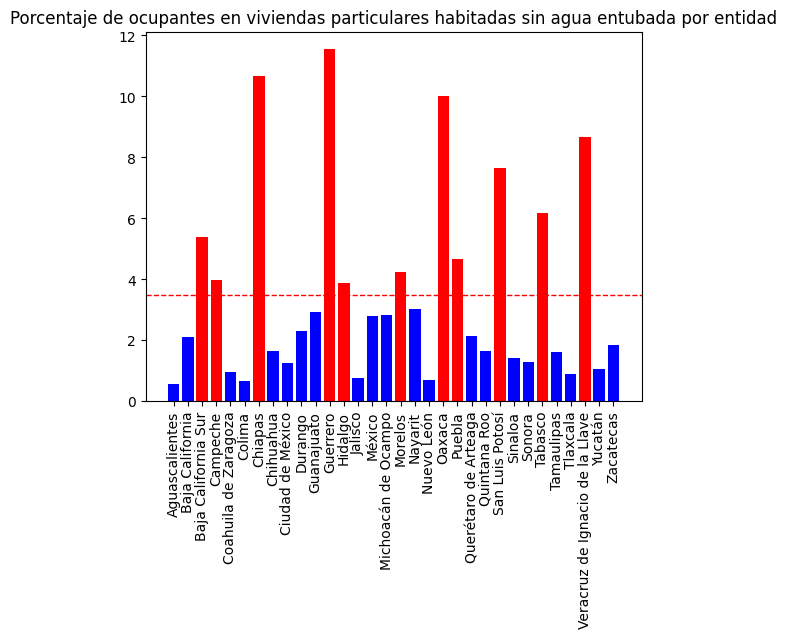

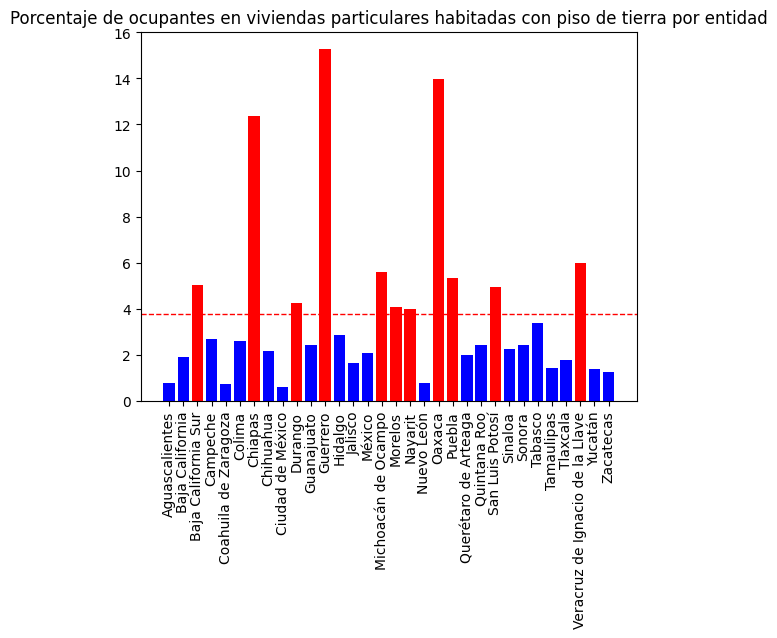

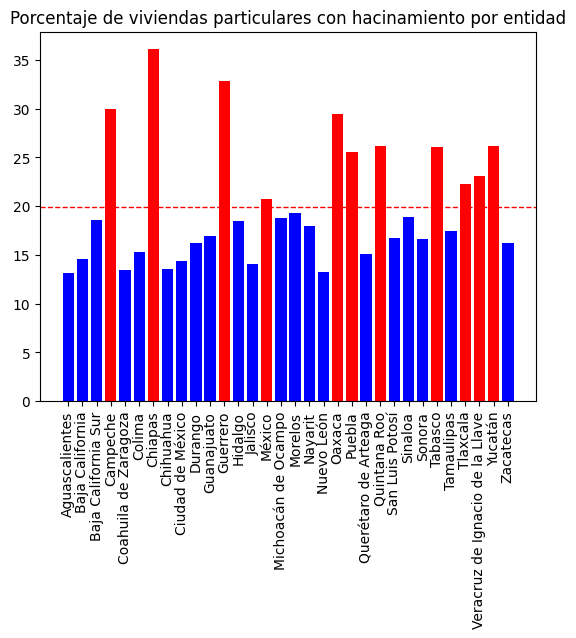

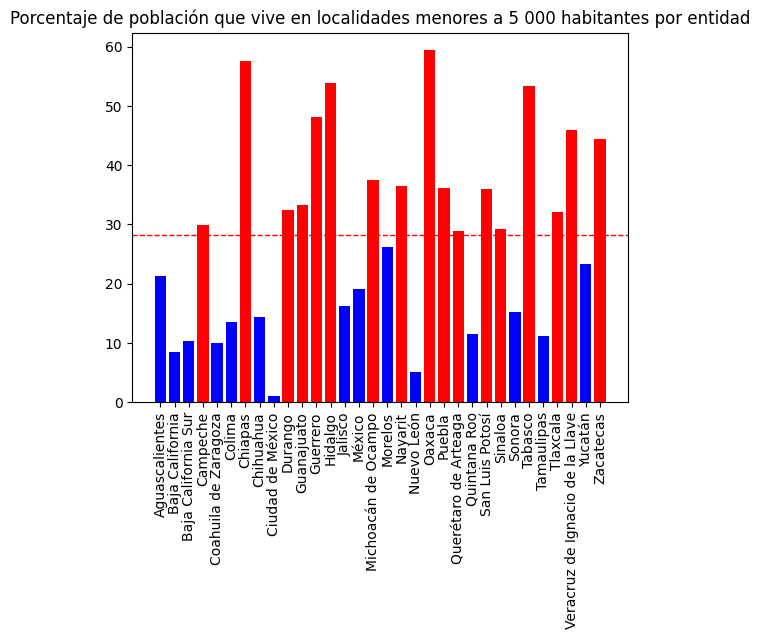

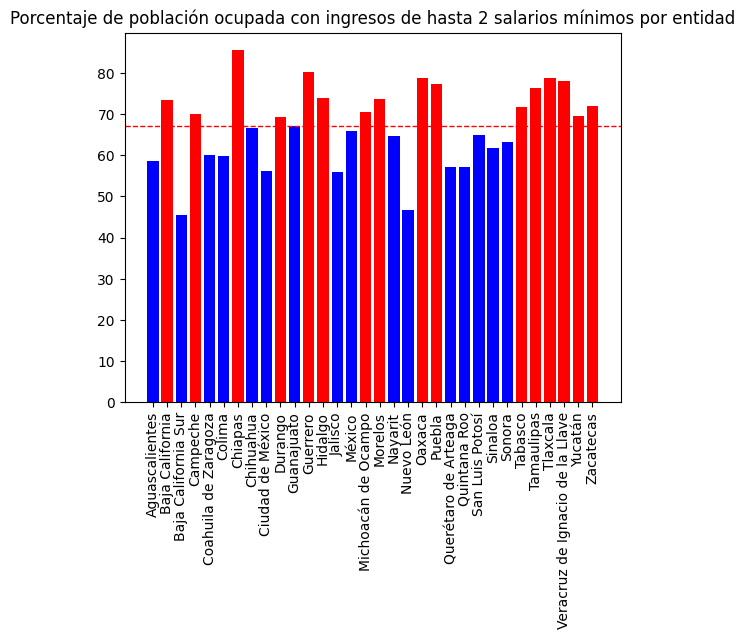

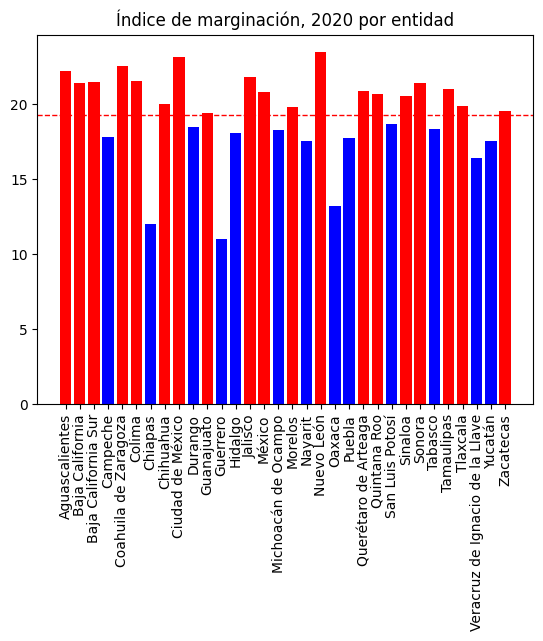

In [144]:
columnas = df_ime.columns[3:12]
for col_name in columnas:
  dibujar_barras_por_estado(col_name)


In [78]:
#Máximos
df_max = df_ime_nombres.max()
print("Máximos\n")
print(df_max)

Máximos

Nombre de entidad federativa                                                           Zacatecas
Población total                                                                         16992418
Porcentaje de población analfabeta de 15 años o más                                     13.70068
Porcentaje de población de 15 años o más sin educación básica                           48.11955
Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado     9.383755
Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica       2.126304
Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada          11.549285
Porcentaje de ocupantes en viviendas particulares habitadas con piso de tierra         15.266973
Porcentaje de viviendas particulares con hacinamiento                                  36.094395
Porcentaje de población que vive en localidades menores a 5 000 habitantes             59.401478
Porcentaje de poblaci